# House Prices: Advanced Regression Techniques (Part 2)

We now move to the actual model building part. As usual, we first import some of the libraries we will be needing.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats.stats import pearsonr

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

## Read the Cleaned Data 
First we load the data we cleaned in the previous part.

In [4]:
X_train_complete = pd.read_csv("HousePricesTrainClean.csv")
X_test = pd.read_csv("HousePricesTestClean.csv")
X_train_complete.head()

,Unnamed: 0,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,...,0,0,1,0,0,0,0,1,0,12.247699
1,1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,...,0,0,1,0,0,0,0,1,0,12.109016
2,2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,...,0,0,1,0,0,0,0,1,0,12.317171
3,3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,...,0,0,1,1,0,0,0,0,0,11.849405
4,4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,...,0,0,1,0,0,0,0,1,0,12.429220


In [88]:
X_train = X_train_complete.loc[:,'MSSubClass':'SaleCondition_Partial']
y = X_train_complete['SalePrice']
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
5       11.870607
6       12.634606
7       12.206078
8       11.774528
9       11.678448
10      11.771444
11      12.751303
12      11.877576
13      12.540761
14      11.964007
15      11.790565
16      11.911708
17      11.407576
18      11.976666
19      11.842236
20      12.692506
21      11.845110
22      12.345839
23      11.774528
24      11.944714
25      12.454108
26      11.811555
27      12.631344
28      12.242891
29      11.134604
          ...    
1430    12.165985
1431    11.875838
1432    11.074436
1433    12.136192
1434    11.982935
1435    12.066816
1436    11.699413
1437    12.885673
1438    11.916395
1439    12.190964
1440    12.160034
1441    11.913720
1442    12.644331
1443    11.703554
1444    12.098493
1445    11.767575
1446    11.969724
1447    12.388398
1448    11.626263
1449    11.429555
1450    11.820418
1451    12.567555
1452    11.884496
1453    11.344519
1454    12

## Linear Regression Models
Now we are going to use plain linear regressio and regularized models (both l_1 Lasso and l_2 Ridge) from the scikit learn module. I'll also define a function that returns the cross-validation rmse error so we can evaluate our models and pick the best tuning par

In [6]:
cross_val_score?

Object `cross_val_score` not found.


In [7]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet, Lasso, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


def r2_cv(model, X_train, y, random_state=12345678):
    r2= cross_val_score(model, X_train, y, scoring="r2", cv =KFold(10, shuffle=True, random_state=random_state))
    return(r2)

def rmse_cv(model, X_train, y, random_state=12345678):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv =KFold(10, shuffle=True, random_state=random_state)))
    return(rmse)

In [14]:
model_simple = LinearRegression()
model_simple.fit(X_train, y)
y_pred = model_simple.predict(X_train)
r2_simple_train = r2_score(y,y_pred)
r2_xval_simple =  r2_cv(model_simple, X_train, y)
r2_xval_simple

array([0.84300036, 0.92901153, 0.84469215, 0.93609643, 0.89548341,
       0.89855117, 0.69687123, 0.83627803, 0.90902229, 0.86354626])

In [5]:
model_simple = LinearRegression()
model_simple.fit(X_train, y)
y_pred = model_simple.predict(X_train)

# compute R2 for train and using crossvalidation
r2_simple_train = r2_score(y,y_pred)
r2_xval_simple =  r2_cv(model_simple, X_train, y)

# compute RMSE for train and using crossvalidation
rmse_simple_train = mean_squared_error(y,yp,multioutput='raw_values')
rmse_xval_simple =  rmse_cv(model_simple, X_train, y)

print("Linear Regression")
print("==================================================")
print("\t                  Train R2=%.3f"%(r2_simple_train))
print("\t10-fold Crossvalidation R2=%.3f"%(r2_xval_simple.mean()))
print("\t                  Train RMSE=%.3f"%(rmse_simple_train))
print("\t10-fold Crossvalidation RMSE=%.3f"%(rmse_xval_simple.mean()))

Linear Regression
	                  Train R2=0.947
	10-fold Crossvalidation R2=0.720
	                  Train RMSE=0.008
	10-fold Crossvalidation RMSE=0.171


## Ridge Regression
We now try ridge regression (l_2) and for this purpose we need to select a value of \alpha. The higher the \alpha, the higher the penalization of weights with a large absolute value. We select a possible range of values of \alpha and apply ridge for each value.

In [20]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha), X_train, y).mean()for alpha in alphas]
cv_r2_ridge = [r2_cv(Ridge(alpha = alpha), X_train, y).mean() for alpha in alphas]
cv_ridge

[0.13700558162814816,
 0.13586522067341894,
 0.1331283973363615,
 0.12966150693176054,
 0.12744699934376819,
 0.12692752805634422,
 0.12678529169281316,
 0.1270721886920918,
 0.1284352028592578,
 0.1302843229644286,
 0.13227380874871553]

Put the values into a table and plot them

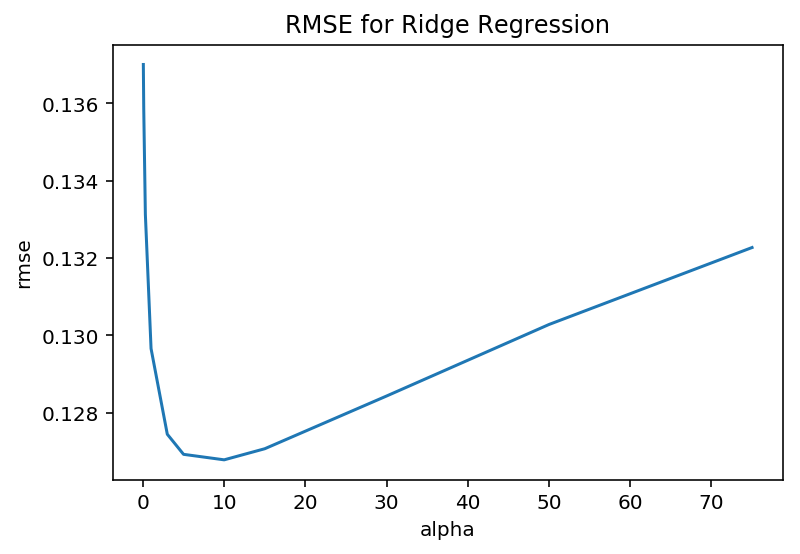

0.05     0.137006
0.10     0.135865
0.30     0.133128
1.00     0.129662
3.00     0.127447
5.00     0.126928
10.00    0.126785
15.00    0.127072
30.00    0.128435
50.00    0.130284
75.00    0.132274
dtype: float64

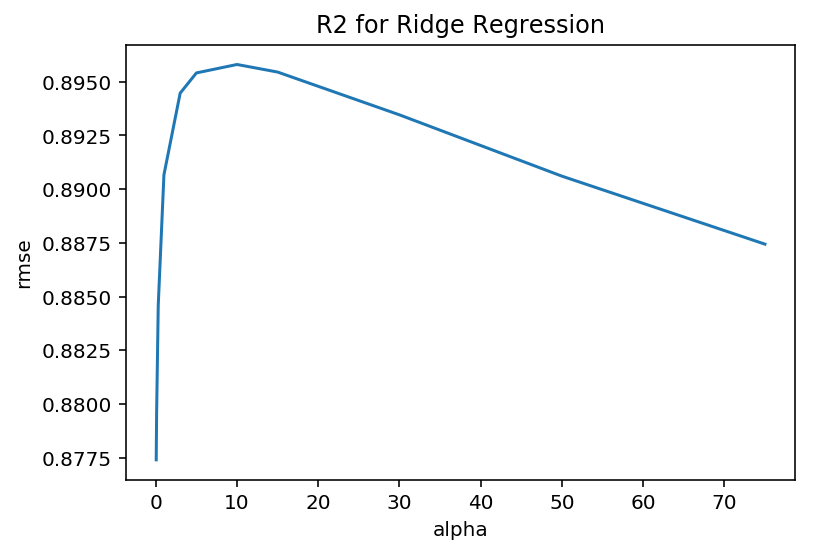

In [23]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_r2_ridge = pd.Series(cv_r2_ridge, index = alphas)

cv_ridge.plot(title = "RMSE for Ridge Regression")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

cv_r2_ridge.plot(title = "R2 for Ridge Regression")
plt.xlabel("alpha")
plt.ylabel("rmse")
cv_ridge


Note the U-ish shaped curve above. When alpha is too large the regularization is too strong and the model cannot capture all the complexities in the data. If however we let the model be too flexible (alpha small) the model begins to overfit. A value of alpha = 10 is about right based on the plot above.

In [8]:
print("Best RMSE %.3f for alpha %.3f"%(cv_ridge.min(),cv_ridge.idxmin()))
print("Best R2 %.3f for alpha %.3f"%(cv_r2_ridge.max(),cv_r2_ridge.idxmax()))
print("Why the difference? R2[10]=%.6f R2[15]=%.6f"%(cv_r2_ridge[cv_ridge.idxmin()],cv_r2_ridge[cv_r2_ridge.idxmax()]))

Best RMSE 0.126 for alpha 10.000
Best R2 0.898 for alpha 15.000
Why the difference? R2[10]=0.897505 R2[15]=0.897513


So for the Ridge regression we get a rmse of about 0.126

## Lasso Regression ($L_1$)
We now test Lasso regression. As before we need to test different values of \alpha. Let' try out the Lasso model. For some reason the alphas in Lasso CV are really the inverse or the alphas in Ridge.

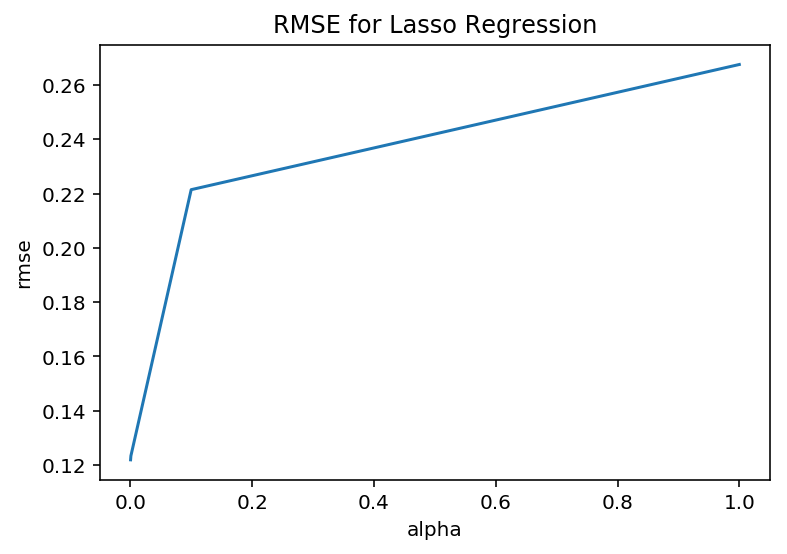

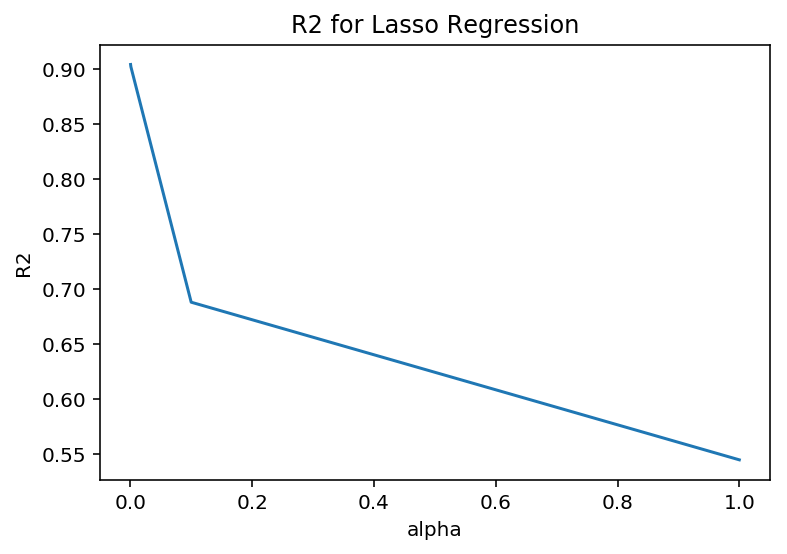

In [9]:
alphas = [1, 0.1, 0.001, 0.0005]
cv_lasso = [rmse_cv(Lasso(alpha = alpha), X_train, y).mean() for alpha in alphas]
cv_r2_lasso = [r2_cv(Lasso(alpha = alpha), X_train, y).mean() for alpha in alphas]

cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_r2_lasso = pd.Series(cv_r2_lasso, index = alphas)

plt.figure(figsize=(6,4))
cv_lasso.plot(title = "RMSE for Lasso Regression")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

plt.figure(figsize=(6,4))
cv_r2_lasso.plot(title = "R2 for Lasso Regression")
plt.xlabel("alpha")
plt.ylabel("R2")
plt.show()

In [10]:
print("Best RMSE %.3f for alpha %.3f"%(cv_lasso.min(),cv_lasso.idxmin()))
print("Best R2 %.3f for alpha %.3f"%(cv_r2_lasso.max(),cv_r2_lasso.idxmax()))

Best RMSE 0.122 for alpha 0.001
Best R2 0.904 for alpha 0.001


## Lasso & Ridge with Built-in Crossvalidation
We performed the cross validation explicitly, but sklearn also provides two functions that include crossvalidation as part of the process, namely, LassoCV and RidgeCV. 

In [43]:
model_ridge = RidgeCV(alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75], cv=KFold(10, shuffle=True, random_state=12345678)).fit(X_train, y)
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005],cv=KFold(10, shuffle=True, random_state=12345678)).fit(X_train, y)

In [25]:
model_ridge

RidgeCV(alphas=array([5.0e-02, 1.0e-01, 3.0e-01, 1.0e+00, 3.0e+00, 5.0e+00, 1.0e+01,
       1.5e+01, 3.0e+01, 5.0e+01, 7.5e+01]),
    cv=KFold(n_splits=10, random_state=12345678, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

We evaluate the resulting model using the same procedure we applied before.

In [47]:
rmse_lasso2 = rmse_cv(model_lasso, X_train, y)
rmse_ridge2 = rmse_cv(model_ridge, X_train, y)

r2_lasso2 = r2_cv(model_lasso, X_train, y)
r2_ridge2 = r2_cv(model_ridge, X_train, y)

Finally, we compare the results achieved with this procedure with the ones compared with the explicit cross validation. 

In [58]:
print("Ridge Regression (10-fold crossvalidation)")
print("\tRMSE=%.3f R2=%.3f for Alpha=%.3f"%(rmse_ridge2.mean(), r2_ridge2.mean(), model_ridge.alpha_))
print("\n")
print("Lasso Regression (10-fold crossvalidation)")
print("\tRMSE=%.3f R2=%.3f for Alpha=%.4f"%(rmse_lasso2.mean(), r2_lasso2.mean(),model_lasso.alpha_))

model_ridge.coef_

Ridge Regression (10-fold crossvalidation)
	RMSE=0.127 R2=0.895 for Alpha=10.000


Lasso Regression (10-fold crossvalidation)
	RMSE=0.123 R2=0.902 for Alpha=0.0005


array([-1.21871818e-02, -4.06497946e-03,  7.65996266e-02,  5.18887397e-02,
        3.98330096e-02,  1.26016690e-03,  6.88756013e-04, -1.58444655e-03,
        1.09289359e-02, -1.53769775e-03, -4.82744510e-03,  4.63751814e-02,
        1.16645563e-01,  8.51934891e-03,  3.52685472e-04,  2.02756841e-01,
        2.52735118e-02,  3.18924428e-04,  3.61028085e-02,  2.70313461e-02,
        4.75304297e-03, -3.43011167e-02,  1.11017908e-02,  1.04992704e-02,
        1.24791780e-06,  4.80943367e-02,  1.30340077e-05,  3.87802842e-03,
        1.85150786e-03,  3.57406765e-03,  5.49831820e-03,  9.62150742e-03,
       -2.20261184e-03, -3.17068814e-03, -5.26909674e-04, -3.71655871e-03,
       -1.46360710e-01,  5.25951615e-02,  3.94003391e-02,  4.17126304e-02,
        1.26525791e-02, -2.32980296e-02,  2.32980296e-02, -6.44731354e-03,
       -1.19261212e-02,  1.83734348e-02,  6.12262070e-03,  2.15837645e-02,
       -3.87389081e-02,  1.10325230e-02, -3.39312093e-02,  2.23779062e-02,
       -3.66122658e-03,  

The results are similar to the ones we obtained with the explicit search for $\alpha$. 


## Feature Selection
One nice feature of Lasso regression is that by zeroing out the coefficients of variables that it deems unimportant, it actually performs feature selection. In practise, it simplifies the data while building the model.

In [54]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
coef

MSSubClass              -0.008152
LotFrontage              0.000000
LotArea                  0.072079
OverallQual              0.053189
OverallCond              0.042938
YearBuilt                0.001759
YearRemodAdd             0.000732
MasVnrArea              -0.000111
BsmtFinSF1               0.009304
BsmtFinSF2              -0.001415
BsmtUnfSF               -0.003962
TotalBsmtSF              0.019337
1stFlrSF                 0.031504
2ndFlrSF                -0.003309
LowQualFinSF            -0.003570
GrLivArea                0.397310
BsmtFullBath             0.026012
BsmtHalfBath             0.000000
FullBath                 0.021521
HalfBath                 0.013921
BedroomAbvGr            -0.000881
KitchenAbvGr            -0.009690
TotRmsAbvGrd             0.005130
Fireplaces               0.015817
GarageYrBlt              0.000004
GarageCars               0.037935
GarageArea               0.000049
WoodDeckSF               0.004363
OpenPorchSF              0.001607
EnclosedPorch 

In [61]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 113 variables and eliminated the other 187 variables


In [62]:
sum(coef==0)

187

Note that, the process is stochastic and thus we cannot be sure that the selected variables are exactly the good ones so one approach is to run the procedure several times (using bootstrap which we will discuss later in the course) to check how robust the feature selection is. For instance, we check if there are variables whose weight is always zeroed out. As an example, let's plot the largest and the smallest coefficients.

In [64]:
imp_coef = pd.concat([coef.sort_values().head(20),
                     coef.sort_values().tail(20)])

In [70]:
imp_coef

RoofMatl_ClyTile        -0.692081
MSZoning_C (all)        -0.291884
Condition2_PosN         -0.191572
Neighborhood_Edwards    -0.052080
SaleCondition_Abnorml   -0.047935
MSZoning_RM             -0.037501
CentralAir_N            -0.034933
GarageCond_Fa           -0.032282
LandContour_Bnk         -0.031135
SaleType_WD             -0.030489
Functional_Maj2         -0.027233
BldgType_Duplex         -0.022582
Neighborhood_Mitchel    -0.021049
Foundation_BrkTil       -0.019067
Fence_GdWo              -0.016504
BsmtExposure_No         -0.014917
HouseStyle_2Story       -0.014456
LotConfig_FR2           -0.013170
Condition1_RRAe         -0.011442
SaleType_COD            -0.010973
HeatingQC_Ex             0.027213
1stFlrSF                 0.031504
GarageCars               0.037935
BsmtExposure_Gd          0.039188
RoofMatl_WdShngl         0.040807
Neighborhood_BrkSide     0.041618
OverallCond              0.042938
Neighborhood_Somerst     0.043826
Condition1_Norm          0.048922
BsmtQual_Ex   

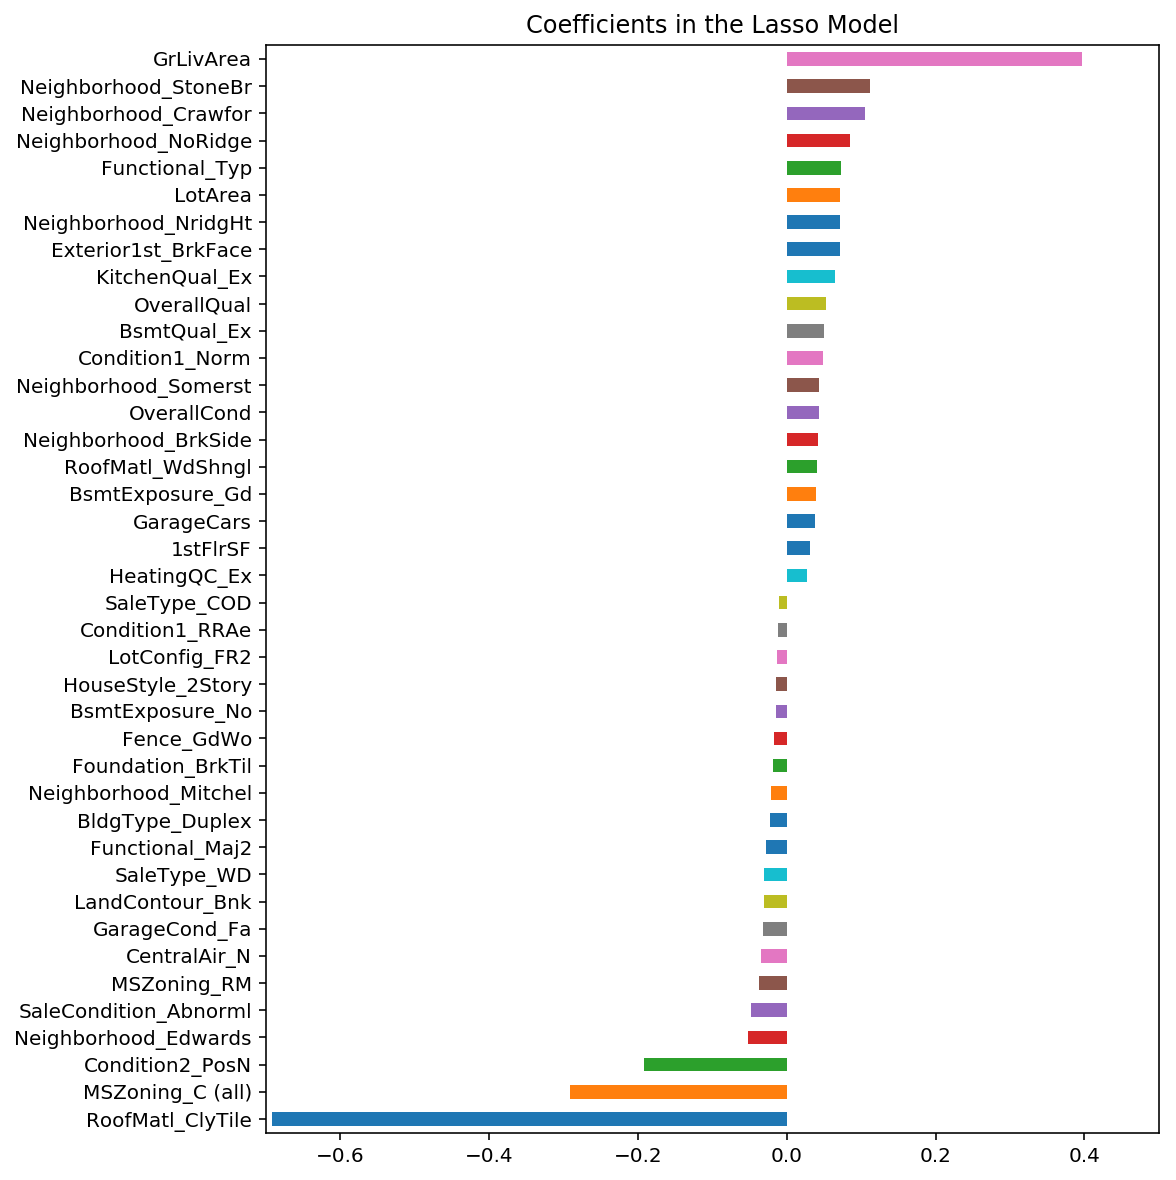

In [81]:
f,ax= plt.subplots(figsize=(8,10))
imp_coef.plot(kind = "barh")
ax.set_title("Coefficients in the Lasso Model")
ax.set_xlim(-0.7,0.5)
plt.show()

__GrLivArea__ appears to be the most important positive feature (it identifies the above ground area by area square feet so it makes sense). Then a few other location and quality features contributed positively. Some of the negative features make less sense and would be worth looking into more.

Let's also check the residuals, that is the difference between the predicted and the actual value plotted against the predicted value.

,preds,true,residuals
0,12.243710,12.247699,0.003989
1,12.163973,12.109016,-0.054957
2,12.297854,12.317171,0.019317
3,12.059688,11.849405,-0.210283
4,12.617505,12.429220,-0.188285


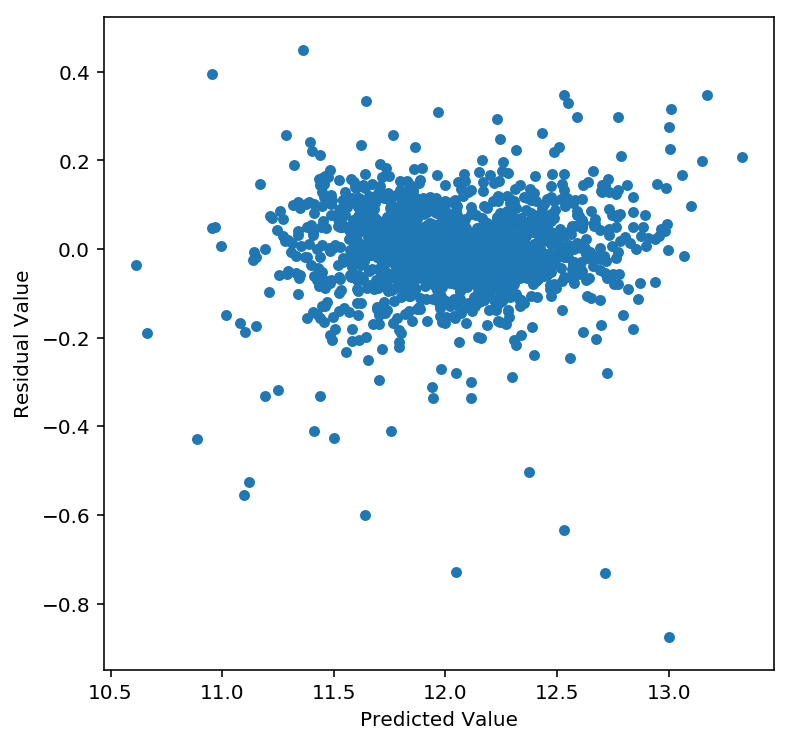

In [87]:


preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]

preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predicted Value")
plt.ylabel("Residual Value")


In [92]:
ridge_coef = pd.Series(model_ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(ridge_coef != 0)) + " variables and eliminated the other " +  str(sum(ridge_coef == 0)) + " variables")

Ridge picked 300 variables and eliminated the other 0 variables


(-0.7, 0.5)

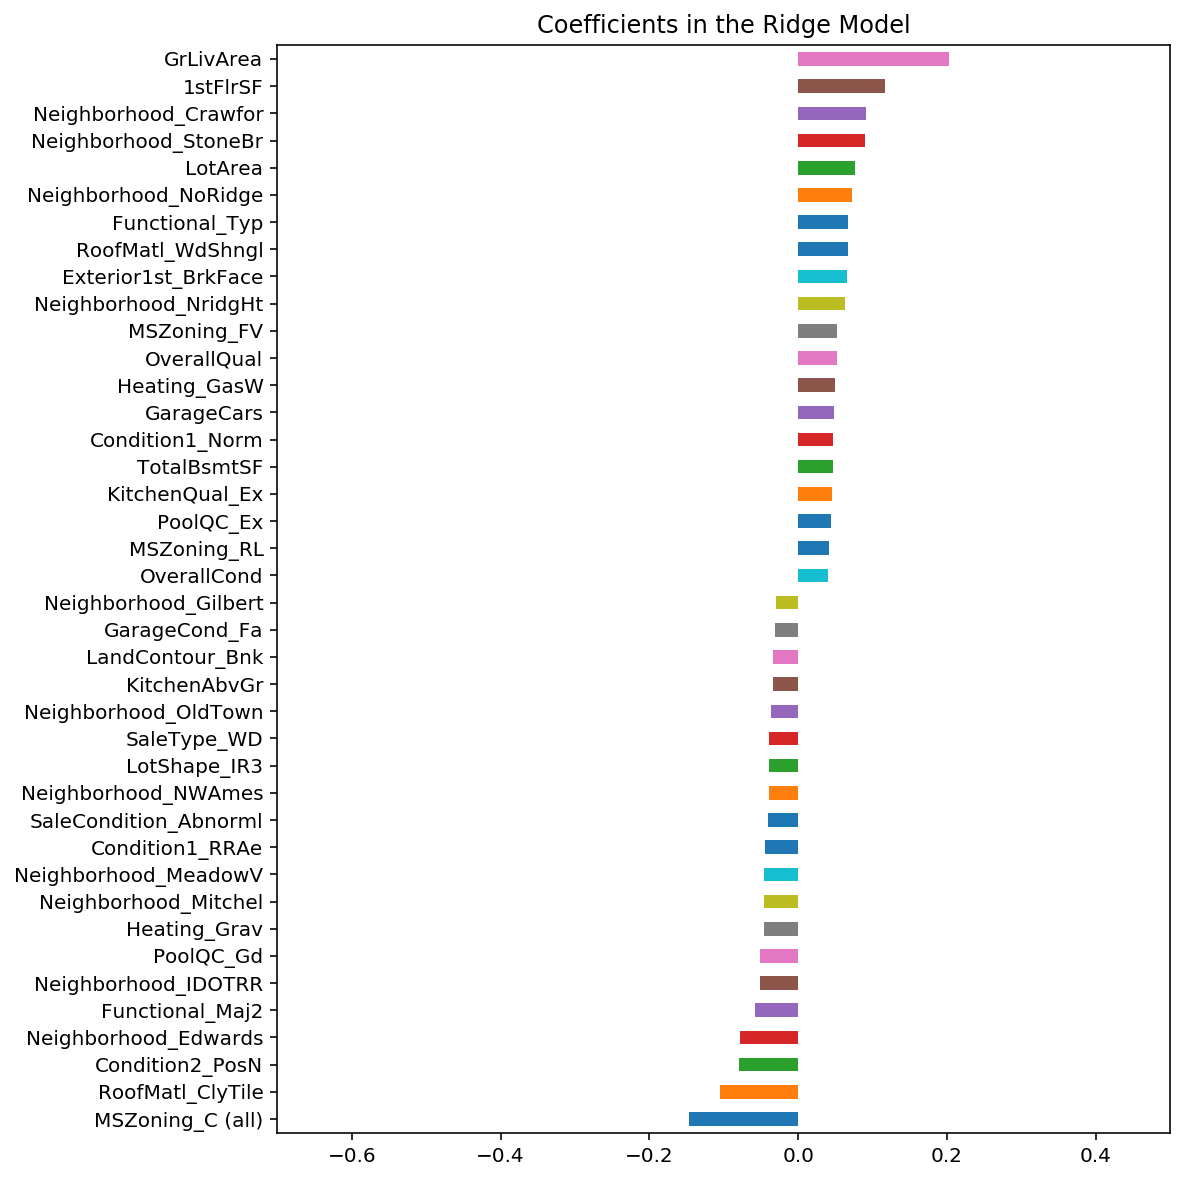

In [91]:
ridge_imp_coef = pd.concat([ridge_coef.sort_values().head(20),
                     ridge_coef.sort_values().tail(20)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
ridge_imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.xlim(-0.7,0.5)